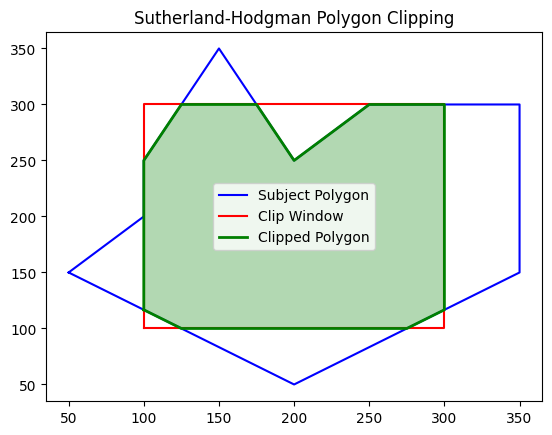

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def clip(subject_poly, clip_poly):
    def inside(p, cp1, cp2):
        return (cp2[0]-cp1[0])*(p[1]-cp1[1]) > (cp2[1]-cp1[1])*(p[0]-cp1[0])

    def intersection(cp1, cp2, s, e):
        dc = [cp1[0] - cp2[0], cp1[1] - cp2[1]]
        dp = [s[0] - e[0], s[1] - e[1]]
        n1 = cp1[0] * cp2[1] - cp1[1] * cp2[0]
        n2 = s[0] * e[1] - s[1] * e[0] 
        n3 = 1.0 / (dc[0] * dp[1] - dc[1] * dp[0])
        return [(n1*dp[0] - n2*dc[0]) * n3, (n1*dp[1] - n2*dc[1]) * n3]

    output_list = subject_poly
    cp1 = clip_poly[-1]
    
    for clip_vertex in clip_poly:
        cp2 = clip_vertex
        input_list = output_list
        output_list = []
        s = input_list[-1]
        
        for subject_vertex in input_list:
            e = subject_vertex
            if inside(e, cp1, cp2):
                if not inside(s, cp1, cp2):
                    output_list.append(intersection(cp1, cp2, s, e))
                output_list.append(e)
            elif inside(s, cp1, cp2):
                output_list.append(intersection(cp1, cp2, s, e))
            s = e
        cp1 = cp2
    
    return output_list

# Example usage
subject_polygon = [(50, 150), (200, 50), (350, 150), (350, 300), (250, 300), (200, 250), (150, 350), (100, 250), (100, 200),(50,150)]
clip_polygon = [(100, 100), (300, 100), (300, 300), (100, 300)]

clipped_polygon = clip(subject_polygon, clip_polygon)

# Plotting
subject_poly = np.array(subject_polygon)
clip_poly = np.array(clip_polygon)
clipped_poly = np.array(clipped_polygon)

plt.figure()
plt.plot(subject_poly[:,0], subject_poly[:,1], 'b-', label='Subject Polygon')
plt.plot(np.append(clip_poly[:,0], clip_poly[0,0]), 
         np.append(clip_poly[:,1], clip_poly[0,1]), 'r-', label='Clip Window')
plt.plot(np.append(clipped_poly[:,0], clipped_poly[0,0]), 
         np.append(clipped_poly[:,1], clipped_poly[0,1]), 'g-', linewidth=2, label='Clipped Polygon')
plt.fill(clipped_poly[:,0], clipped_poly[:,1], 'g', alpha=0.3)
plt.legend()
plt.title("Sutherland-Hodgman Polygon Clipping")
plt.show()